In [246]:
#Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
#importing datasets
deliveries_data=pd.read_csv("deliveries.csv")
match_data=pd.read_csv("matches.csv")

## Basic Data analysis

In [249]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [250]:
match_data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [251]:
match_data.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [252]:
match_data.shape

(1095, 20)

In [253]:
match_data.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [254]:
#Total matches played
print("Total matches played:",match_data.shape[0])

Total matches played: 1095


In [255]:
#Number of venues played at
print("Total number of unique venues played at:",match_data["city"].nunique())

Total number of unique venues played at: 36


In [256]:
#Total number of teams
print("The total number of teams in IPL history is:",match_data["team1"].nunique())
print("\nThey are:")
for i in match_data["team1"].unique() :
    print(i)

The total number of teams in IPL history is: 19

They are:
Royal Challengers Bangalore
Kings XI Punjab
Delhi Daredevils
Mumbai Indians
Kolkata Knight Riders
Rajasthan Royals
Deccan Chargers
Chennai Super Kings
Kochi Tuskers Kerala
Pune Warriors
Sunrisers Hyderabad
Gujarat Lions
Rising Pune Supergiants
Rising Pune Supergiant
Delhi Capitals
Punjab Kings
Lucknow Super Giants
Gujarat Titans
Royal Challengers Bengaluru


In [257]:
#Most number of wins
print(match_data["winner"].value_counts().idxmax(),"Has the most number of wins with",match_data["winner"].value_counts().max(),"wins")

Mumbai Indians Has the most number of wins with 144 wins


## Number of matches played in all seasons

In [259]:
match_data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [260]:
matchperseason=match_data.groupby(["season"])["id"].count().reset_index().rename(columns={'id':'matches'})
matchperseason

,season,matches
0,2007/08,58
1,2009,57
2,2009/10,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


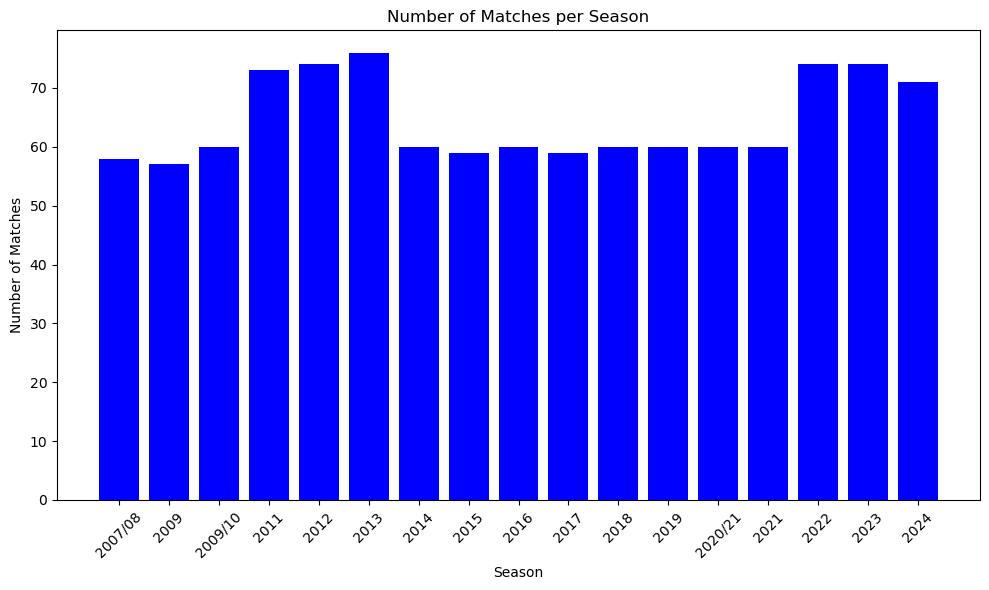

In [261]:
plt.figure(figsize=(10,6))
plt.bar(matchperseason['season'].astype(str), matchperseason['matches'], color='blue')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Number of Matches per Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Number of Teams in all the seasons

In [263]:
team1 = match_data[['season', 'team1']].rename(columns={'team1': 'team'})
team2 = match_data[['season', 'team2']].rename(columns={'team2': 'team'})

all_teams = pd.concat([team1, team2])
unique_teams = all_teams.drop_duplicates()

teams_per_season = unique_teams.groupby('season')['team'].nunique().reset_index(name='total_teams')

teams_per_season


,season,total_teams
0,2007/08,8
1,2009,8
2,2009/10,8
3,2011,10
4,2012,9
5,2013,9
6,2014,8
7,2015,8
8,2016,8
9,2017,8


<div class ="alert alert-block alert-info"><p style='color:black;'>From the above results we can see the reason for the rise in number of matches in the year 2011 to 2013 and in 2022,2023,2024 is cause of the increase in the number of teams from 8 to 10.</p></div>

## Total number of runs scored across seasons

In [266]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [267]:
season_data = match_data[['id', 'season']].merge(deliveries_data, left_on='id', right_on='match_id', how='left'
).drop('id', axis=1)

season_data.head()


,season,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,2007/08,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [268]:
season_runs = season_data.groupby('season')['total_runs'].sum().reset_index()
season_runs.columns = ['Season', 'Total Runs']
season_runs

,Season,Total Runs
0,2007/08,17937
1,2009,16353
2,2009/10,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


In [269]:
season_runs.loc[season_runs["Total Runs"].idxmax()]
#highest runs in a season

Season         2024
Total Runs    25971
Name: 16, dtype: object

## Number of tosses won by teams

In [271]:
tosswinners=match_data["toss_winner"].value_counts()
tosswinners

toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

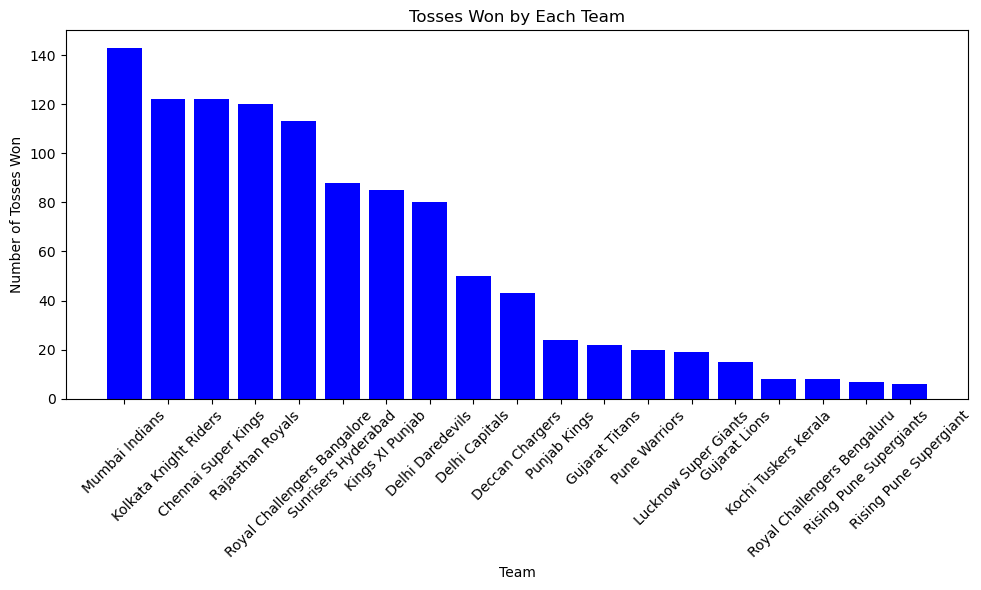

In [272]:
plt.figure(figsize=(10,6))
plt.bar(tosswinners.index, tosswinners.values, color='blue')
plt.xlabel('Team')
plt.ylabel('Number of Tosses Won')
plt.title('Tosses Won by Each Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class ="alert alert-block alert-info"><p style='color:black;'>Mumbai Indians Toss scammers - Confirmed </p></div>

## Toss wins = Game wins?

In [275]:
toss = match_data.copy()
toss['tosswin=gamewin'] = np.where(toss.toss_winner == toss.winner, 'Yes', 'No')
toss.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,tosswin=gamewin
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,No
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,Yes
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,No
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,No
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,No


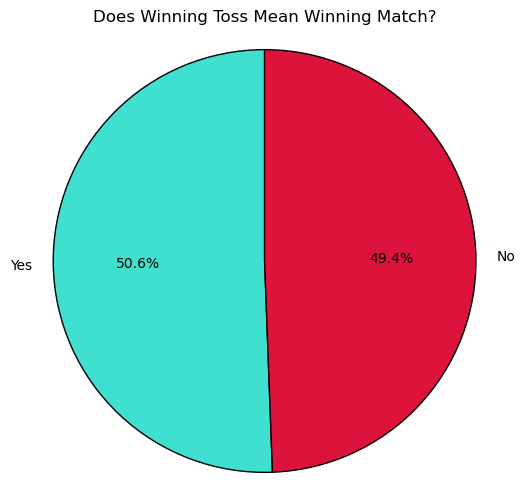

In [276]:
values = toss['tosswin=gamewin'].value_counts()
labels = values.index
colors = ['turquoise', 'crimson']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Does Winning Toss Mean Winning Match?')
plt.axis('equal')  
plt.show()

## Venues where winning the toss gives an advantage

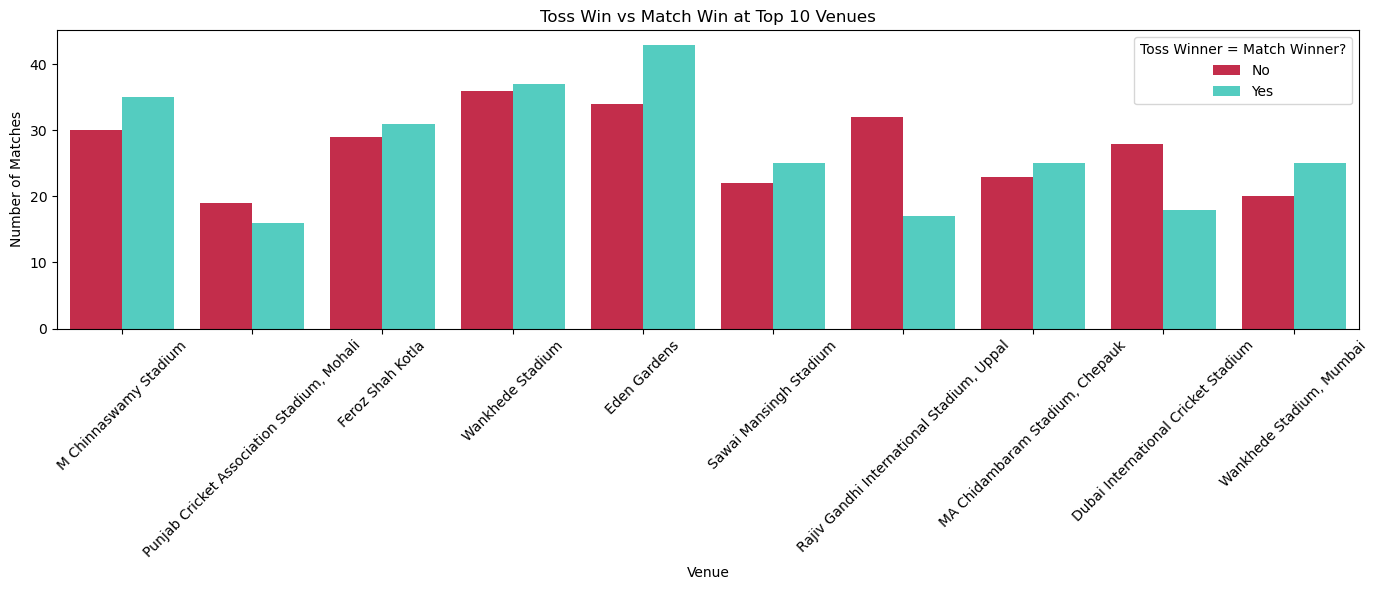

In [278]:
top_venues = toss['venue'].value_counts().nlargest(10).index

filtered_toss = toss[toss['venue'].isin(top_venues)]

plt.figure(figsize=(14,6))
sns.countplot(data=filtered_toss, x='venue', hue='tosswin=gamewin', palette=['crimson', 'turquoise'])

plt.title('Toss Win vs Match Win at Top 10 Venues')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Toss Winner = Match Winner?')
plt.tight_layout()
plt.show()